# Importing the required libraries

In [63]:
import warnings
from shapely.errors import ShapelyDeprecationWarning

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
from scipy import signal
import seaborn as  sns
import cv2
import cartopy.feature as cf
import xarray as xr
import  netCDF4 as ncc
import cartopy as cct
import statistics as st
from scipy import stats
from scipy.stats import norm
from scipy.io import netcdf as ncf
from mpl_toolkits.basemap import Basemap as bsm
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

# Question1.

In [4]:
dataset1=pd.read_csv('sampledata.txt',header=None)# Read the data
dataset2=pd.read_csv('sampledata2.txt',header=None)# Read the data

In [5]:
dataset1.columns=['Temp1']  #Name the column


dataset2.columns=['Temp2']  #Name the column


In [6]:
print(dataset1.head(10) ,'\n\n' ) #display first 10 elements
print(dataset2.head(10) )  #display first 10 elements

     Temp1
0  27.7418
1  28.8704
2  27.1007
3  27.0132
4  27.3996
5  28.4364
6  28.6897
7  26.0483
8  27.5327
9  28.1471 


     Temp2
0  27.9117
1  28.2062
2  28.1308
3  27.7130
4  27.7183
5  27.9801
6  28.5383
7  28.1899
8  28.0305
9  28.1160


# Let concatenate the datasets together

In [7]:
dataset=[dataset1,dataset2]
Main_data=pd.concat(dataset,axis=1)

Main_data.head()

,Temp1,Temp2
0,27.7418,27.9117
1,28.8704,28.2062
2,27.1007,28.1308
3,27.0132,27.7130
4,27.3996,27.7183


# Plot  the datasets

In [103]:
import os
os.getcwd()

'C:\\Users\\gasan\\Desktop\\book\\gitt\\Advection-Linear-Diffusion\\Numerical_data_analysis_course'

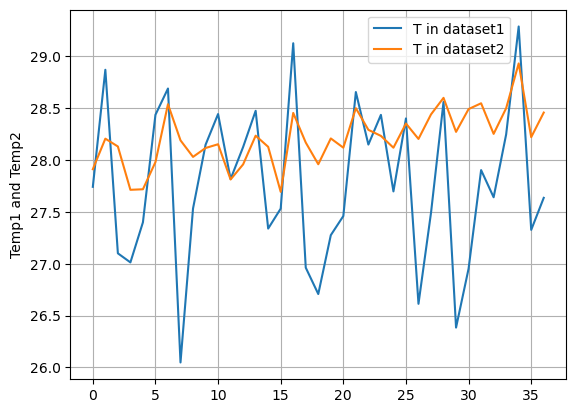

In [107]:
# plt.subplots_adjust(hspace=0.6,wspace=0.6)

sns.lineplot(data=Main_data.iloc[:,0])
sns.lineplot(data=Main_data.iloc[:,1])
plt.grid('on')
plt.legend(['T in dataset1','T in dataset2'],loc='upper right',bbox_to_anchor=(0.9,1.0))
plt.ylabel('Temp1 and Temp2')
plt.savefig('Datasets-timeseries1.jpeg')


# This image shows that the dataset 1 has a high variability compared to the second dataset 2. This proves that it can cause a problem when we are doing aprediction based on the dataset 1.
<img src='Datasets-timeseries1.jpeg' style= "width:500px;height:400px">

# Let's Compute the matrix for covariance

In [9]:
Main_data[['Temp2','Temp1']].cov()

,Temp2,Temp1
Temp2,0.072409,0.085144
Temp1,0.085144,0.591207


# Here we are going to compute the regretion coefficients $\beta_1=\frac{cov(X,y)}{var(X)}$ as a slope and $\beta_0=\overline{Y}-\beta_1 \cdot\overline {X}$ as an intercept point given that estimated output $\hat{Y} = \beta_0 +\beta_1 X$. Where $X$ represents predictors, $\overline{X}$ represents $X$ mean, and $\overline{Y}$ represents $Y$ mean.

# We will also need the covariance matrix that will produce $var(X)$ and $cov(X,y)$.

# $Cov_{matrix}(X,y)=\begin{bmatrix}var(x) & cov(X,y)\\
cov(y,X) & var(y)\end{bmatrix}$ Given that $cov(X,y)=cov(y,X)$

In [10]:
X=Main_data['Temp1'].values  #Variable value
y=Main_data['Temp2'].values   #Out put value
x_mean=X.mean()    #Compute the value of x mean
y_mean=y.mean()   #Compute the value of y mean

print('X_mean=',x_mean)
print('y_mean=',y_mean)

cov_matrix=Main_data[['Temp2','Temp1']].cov().values  #Compute the value of covariance matrix



cov_x_y=cov_matrix[0,1]  #Since diagonal is made by variance and cov matrix is symmetric, cov(X,y) is at [0,1] and [1,0] position

var_x=cov_matrix[1,1]  #We get var(x) as Temperature from dataset1 works as x

var_y=cov_matrix[0,0]  #This is variance for y as Temperature from dataset 2

Var_xx=np.var(dataset1.values)  #We can check if we use another function for variance from numpy


slope=cov_x_y/var_x  #compute slope based on the value from covaraince matrix

slope2=cov_x_y/Var_xx #Compute slope from the value using the value of variance function from numpy

intercept=y_mean-slope*x_mean #Compute an intercept point using value from cov matrix

intercept2=y_mean-slope2*x_mean # Compute an intercept point from numpy function np.var(X)

Estimated_y=slope*X+intercept  #Evaluate the estimate value of y using values from cov matrix

Estimated_y2=slope2*X+intercept2 #Evaluate the estimate value of y using values from np.var(X) 


print('slope=',slope,' from covariance matrix\n')

print('Intercept=',intercept,' based on the cov matrix')

X_mean= 27.773789189189184
y_mean= 28.21174054054054
slope= 0.1440178967713077  from covariance matrix

Intercept= 24.21181783614383  based on the cov matrix


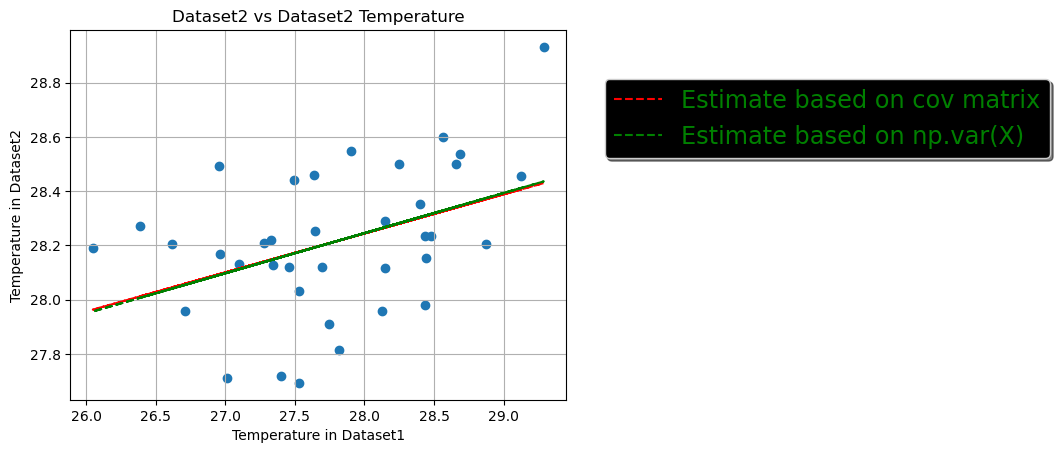

In [27]:
plt.plot(X,Estimated_y,'r--',label='Estimate based on cov matrix')
plt.plot(X,Estimated_y2,'g--',label='Estimate based on np.var(X)')

plt.title('Dataset2 vs Dataset2 Temperature')
plt.xlabel('Temperature in Dataset1')
plt.ylabel('Temperature in Dataset2')
plt.legend(loc='upper right',bbox_to_anchor=(2.0,0.9),facecolor='k',shadow=True,fancybox=True,labelcolor='g',fontsize='xx-large')
plt.grid('on')
plt.scatter(X,y)
plt.show()

# READ The data and analyze them for regression and 

In [11]:
data=ncc.Dataset('era5_tas_1959_2021_25deg.nc',mode='r')

# Get the values for longitudes,latitudes, and Temperature

In [47]:
long=data.variables['lon'][:]
lat=data.variables['lat'][:]
Temperature=data.variables['t2m'][:]
time=data.variables['time'][:]

# Variables reading

In [10]:
data.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     standard_name: time
     long_name: time
     units: hours since 1900-01-01 00:00:00.0
     calendar: gregorian
     axis: T
 unlimited dimensions: time
 current shape = (756,)
 filling on, default _FillValue of -2147483647 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(lon)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (144,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (73,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 't2m': <class 'netCDF4._netCDF4.Variable'>
 float32 t2m(time, lat, lon)
     long_name: 2 metre temperature
     units: K
     _FillValue: -32767.0
     missing_value: -

# Let's create a function for converting into celcius degree

In [26]:
def KelvinToCelcius(T)->np.ndarray:
    return T-273.15

In [27]:
Temper_celcius=KelvinToCelcius(Temperature)

# Functions for computing standard deviation,mean, and variance over time axis

In [31]:
def Averaging(Var)->np.ndarray:
    return np.average(Var,axis=0)

def StandardDeviation(var)->np.ndarray:
    return np.std(var,axis=0)

def Variance(var)->np.ndarray:
    return np.var(var,axis=0)

In [50]:
Temp_average=Averaging(Temper_celcius)
Temp_std=StandardDeviation(Temper_celcius)
Temp_var=Variance(Temper_celcius)

# Function for Longitude and latitudes to plot on the map

In [52]:
def Lat_Lon_toPlot(lon_min,lon_max,lat_min,lat_max)->np.ndarray:
    meridian_line=np.arange(lon_min,lon_max,60.)
    Latitude_line=np.arange(lat_min,lat_max,30.)
    return meridian_line, Latitude_line



In [69]:
long_line,lat_line=Lat_Lon_toPlot(-180,180,-90,91)

# Function for computing modulo and trends in temperature

In [66]:
def mod(n,r):
    """ Receive two values and return modulo"""
    return n%r
  

def GetTrend(Temperature,Longtd,Latitd,Time):
    """Get a certain data in 3D,longitude (longittd),latitude(latitd),and time in terms of year
      and will return the array (2D) of trends to all latitudes and longitudes."""
    
     #Get the number of available longitude, latitude, and time   
    
    nbr_lat=len(Latitd)
    nbr_long=len(Longtd)
    nbr_points=nbr_lat*nbr_long
    
    nbr_time=len(Time)
   
        
    
    #Initialize array to keep the trends in Temperature
    Year_Temperature_trend=np.zeros(nbr_points)
    
    #Let's check if the data has the dimension of 3:
    if len(Temperature.shape)==3:
        #if yes we will shape the data in terms of all time and points
        new_Temp_reshaping=Temperature.reshape(nbr_time,nbr_points)
        
        for coordinate in range(nbr_points):
            #Now, we get the temperature of a certain point in all of the years
            current_time_Temp_value=new_Temp_reshaping[:,coordinate]
            #we get a trend at that point
            Year_Temperature_trend[coordinate],intercept,r_value,p_value,std_error=stats.linregress(Time,current_time_Temp_value)
            
            #After we reshape our trends to  all of the coordinates
    Slope_values=Year_Temperature_trend.reshape(nbr_lat,nbr_long)
    
    return Slope_values
        

In [67]:
nlong=len(long)
nlat=len(lat)
ntime=len(time)

# Here my Temperature data is in monthly time dimension.

months=12

nbr_year=ntime//months #Number of years

years=np.linspace(1959,2021,63) #63 is the number of years


Temperature=Temperature.reshape(nbr_year,months,nlat,nlong)

#Let's an average over the months to make years without considering NaN values
Temperature_monthly_mean=np.nanmean(KelvinToCelcius(Temperature),axis=1)


# Now lets calculate linear trend per year

Temperature_trend=GetTrend(Temperature_monthly_mean,Longtd=long,Latitd=lat,Time=years)


In [68]:
Temperature_trend

array([[0.00895573, 0.00895573, 0.00895573, ..., 0.00895573, 0.00895573,
        0.00895573],
       [0.01211416, 0.01221146, 0.0122815 , ..., 0.01154409, 0.0116955 ,
        0.01191225],
       [0.02196274, 0.02251281, 0.02315281, ..., 0.01978801, 0.02052122,
        0.02125706],
       ...,
       [0.05563502, 0.05531316, 0.05652852, ..., 0.052877  , 0.05370025,
        0.05491154],
       [0.05974498, 0.0602239 , 0.06067121, ..., 0.05914081, 0.05892363,
        0.05934905],
       [0.06916831, 0.06916831, 0.06916831, ..., 0.06916831, 0.06916831,
        0.06916831]])

In [90]:
Temperature.shape

(63, 12, 73, 144)

In [72]:
Tmax=Temperature_trend.max()
Tmin=Temperature_trend.min()
print(Tmax,Tmin)

0.13254180400075818 -0.02213881645471819


In [88]:
Temperature_trend.shape

(73, 144)

# Now we are going to plot our Temperature trend in all of year from 1959 to 2021.

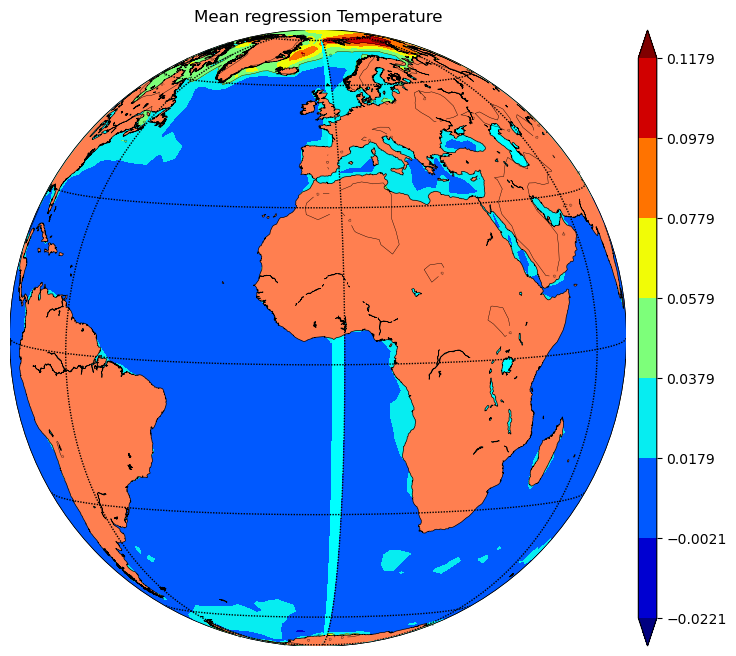

In [100]:


# make some plot 

plt.figure(figsize=(10,8)) #setting the figure size

map = bsm(projection='ortho',lon_0=-5,lat_0=5,resolution='l')      
#This like sets the lat lon of the plot. Projection cylinder. 

map.drawcoastlines(linewidth=.5)  #draws coastline 

# make latitude lines ever 30 degrees from 30N-50N
# make longitude lines every 60 degrees from 95W to 70W
long_line,lat_line=Lat_Lon_toPlot(-180,180,-90,91)

#labelling the lat and lon dimesion

# map.drawparallels(lat_line,labels=[1,0,0,0],linewidth=0.2,fontsize=8)
# map.drawmeridians(long_line,labels=[0,0,0,1],linewidth=0.2,fontsize=8)

lons,lats= np.meshgrid(long,lat) #2D lat lon to plot contours
x,y = map(lons,lats)

clevsf = np.arange(Tmin,Tmax,0.02) 
clevs = np.arange(Tmin,Tmax,0.06)

#clevs and clevsf sets the contour interval of contour and filled contour. if you don't set it, it will plot default values.

contourf_mapping = map.contourf(x,y,Temperature_trend,clevsf,extend='both',cmap='jet') #filled
                                                           # contour
cb = map.colorbar(contourf_mapping,"right", extend='both',size="3%", pad="2%")

cs = map.contour(x,y,Temperature_trend,clevs,colors='k',linewidths=0.3)

map.fillcontinents(color='coral',lake_color='aqua')

map.drawparallels(lat_line)
map.drawmeridians(long_line)
map.drawmapboundary(fill_color='aqua')

plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=3, colors='k')
plt.title('Mean regression Temperature')

plt.savefig('Temperature_regression.eps', format='eps', dpi=1000) #saving figure
plt.savefig('Temperature Trend from 1957 to 2021.jpeg')
plt.show()
